In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('Organized-noavg.csv')

df.head()

,Coordinates and Times,.ALPHA.-ENDOSULFAN,.ALPHA.-HEXACHLOROCYCLOHEXANE,.BETA.-ENDOSULFAN,.BETA.-HEXACHLOROCYCLOHEXANE,.DELTA.-HEXACHLOROCYCLOHEXANE,.LAMBDA.-CYHALOTHRIN,"1-(3,4-DICHLOROPHENYL)-3-METHYL UREA",1-CHLOROPROPANE,"1,1-DICHLOROETHANE",...,WIND CONDITION (CHOICE LIST),"WIND DIRECTION (DIRECTION FROM, EXPRESSED 0-360 DEG)",WIND DIRECTION FROM (CHOICE LIST),WIND SPEED (CHOICE LIST),WIND VELOCITY,XYLENE,YTTERBIUM,YTTRIUM,ZINC,ZOXAMIDE
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/30/22 14:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(blank),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18.41459765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#look at the tail of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Columns: 714 entries, Coordinates and Times to ZOXAMIDE
dtypes: float64(713), object(1)
memory usage: 376.0+ MB


In [24]:
df.drop(columns='Coordinates and Times',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Columns: 713 entries, .ALPHA.-ENDOSULFAN to ZOXAMIDE
dtypes: float64(713)
memory usage: 375.5 MB


In [25]:
df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = pd.to_numeric(df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df.info

<bound method DataFrame.info of        .ALPHA.-ENDOSULFAN  .ALPHA.-HEXACHLOROCYCLOHEXANE  .BETA.-ENDOSULFAN  \
0                     0.0                            0.0                0.0   
1                     0.0                            0.0                0.0   
2                     0.0                            0.0                0.0   
3                     0.0                            0.0                0.0   
4                     0.0                            0.0                0.0   
...                   ...                            ...                ...   
69026                 0.0                            0.0                0.0   
69027                 0.0                            0.0                0.0   
69028                 0.0                            0.0                0.0   
69029                 0.0                            0.0                0.0   
69030                 0.0                            0.0                0.0   

       .BETA.-HEXAC

In [26]:
df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = pd.to_numeric(df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df.info

<bound method DataFrame.info of        .ALPHA.-ENDOSULFAN  .ALPHA.-HEXACHLOROCYCLOHEXANE  .BETA.-ENDOSULFAN  \
0                     0.0                            0.0                0.0   
1                     0.0                            0.0                0.0   
2                     0.0                            0.0                0.0   
3                     0.0                            0.0                0.0   
4                     0.0                            0.0                0.0   
...                   ...                            ...                ...   
69026                 0.0                            0.0                0.0   
69027                 0.0                            0.0                0.0   
69028                 0.0                            0.0                0.0   
69029                 0.0                            0.0                0.0   
69030                 0.0                            0.0                0.0   

       .BETA.-HEXAC

In [27]:
df=df.astype('float')
df = df.replace(np.nan,0,regex=True)
df.dtypes

.ALPHA.-ENDOSULFAN               float64
.ALPHA.-HEXACHLOROCYCLOHEXANE    float64
.BETA.-ENDOSULFAN                float64
.BETA.-HEXACHLOROCYCLOHEXANE     float64
.DELTA.-HEXACHLOROCYCLOHEXANE    float64
                                  ...   
XYLENE                           float64
YTTERBIUM                        float64
YTTRIUM                          float64
ZINC                             float64
ZOXAMIDE                         float64
Length: 713, dtype: object

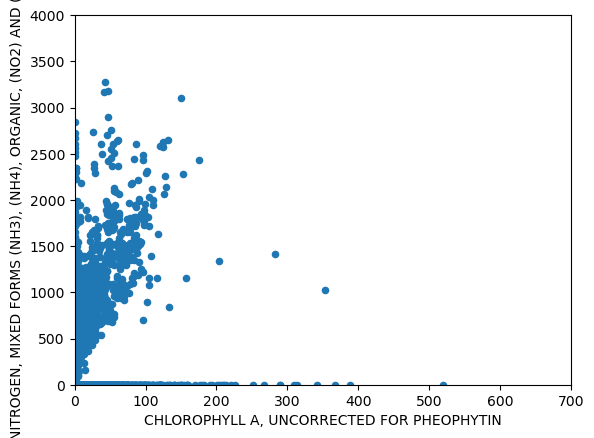

In [28]:
df.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN',ylim=(0,4000),xlim=(0,700))
plt.show()

In [29]:
#Splitting into train and test sets
X=df.loc[:,df.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Columns: 712 entries, .ALPHA.-ENDOSULFAN to ZOXAMIDE
dtypes: float64(712)
memory usage: 375.0 MB


In [30]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-9.52125207e-18 -3.47397035e-18 -9.52125207e-18 -8.49192752e-18
 -1.92998353e-18 -7.84859968e-18 -1.41532125e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.47965404e-17  0.00000000e+00  5.91861615e-18
 -1.02932455e-18  0.00000000e+00 -2.66337727e-17 -6.04728172e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.07660627e-18  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.56194400e-18  0.00000000e+00  3.21663921e-18  2.18731467e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.70197694e-18
 -5.14662274e-19  0.00000000e+00  0.00000000e+00  9.39258650e-18
 -1.41532125e-18 -1.46678748e-17  9.77858321e-18  0.00000000e+00
  0.00000000e+00 -1.38958

In [31]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_scaled, Y_train)
train_accuracy = model.score(X_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')


The accuracy for the training set is 51.17%
The accuracy for the test set is -25307713529180210811895808.00%


In [32]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()


model.fit(X_scaled, Y_train)
train_accuracy = model.score(X_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 96.49%
The accuracy for the test set is -329.06%


In [33]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()


model.fit(X_scaled, Y_train)
train_accuracy = model.score(X_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 80.21%
The accuracy for the test set is -97.17%


In [34]:


from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()


model.fit(X_scaled, Y_train)
train_accuracy = model.score(X_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 99.81%
The accuracy for the test set is -862.23%
